In [45]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [46]:
df=pd.read_csv('salary_data_michelle.csv')

In [47]:
df[0:5]

,Unnamed: 0,salary,experience,gender
0,0,51494.981021,10.337294,1.0
1,1,27635.274358,6.078640,1.0
2,2,29303.546835,8.730298,0.0
3,3,20326.576332,3.871194,0.0
4,4,44990.474458,10.137524,1.0


In [48]:
df.columns

Index(['Unnamed: 0', 'salary', 'experience', 'gender'], dtype='object')

In [50]:
del df['Unnamed: 0']

In [51]:
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(df.drop('salary', axis = 1),
                                                    np.log1p(df.salary.values),
                                                    test_size =.30,
                                                    random_state=12345)
dtrain = xgb.DMatrix(data = X_train, label=y_train)
dtest = xgb.DMatrix(data = X_test, label=y_test)
param = {'eta':0.1,
         'objective':'reg:linear'}
xgb_model = xgb.train(param, dtrain, num_boost_round=100)
X_test['y_hat_with_bias'] = np.exp(xgb_model.predict(dtest)) - 1

In [52]:
feature_names = dtest.feature_names
interactions = xgb_model.predict(dtest, pred_interactions=True)
pd.DataFrame(interactions[0],
             index = feature_names + ['intercept'],
             columns= feature_names + ['intercept'])

,experience,gender,intercept
experience,-0.18991,0.005270,0.000000
gender,0.00527,0.041079,0.000000
intercept,0.00000,0.000000,10.737479


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt


In [54]:
male=df.loc[df.gender==1]['salary']
m_years=df.loc[df.gender==1]['experience']

In [55]:
female=df.loc[df.gender==0]['salary']
f_years=df.loc[df.gender==0]['experience']

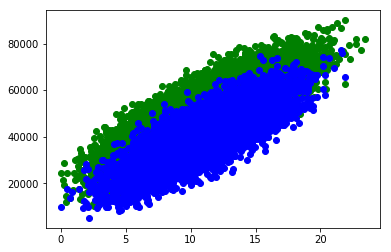

In [56]:
plt.plot(m_years, male, 'go')
plt.plot(f_years, female, 'bo')

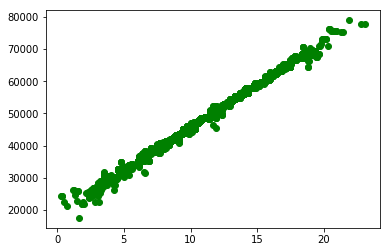

In [57]:
male=X_test.loc[X_test.gender==1]['y_hat_with_bias']
m_years=X_test.loc[X_test.gender==1]['experience']
plt.plot(m_years, male, 'go')

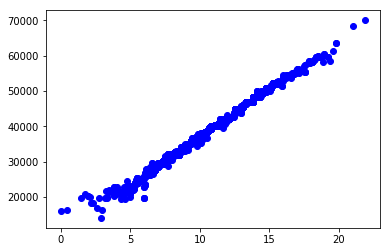

In [58]:
female=X_test.loc[X_test.gender==0]['y_hat_with_bias']
fm_years=X_test.loc[X_test.gender==0]['experience']
plt.plot(fm_years, female, 'bo')

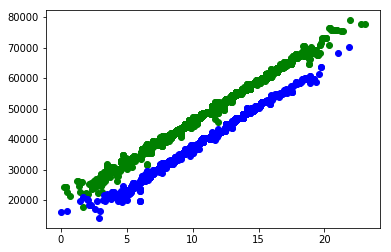

In [60]:
male=X_test.loc[X_test.gender==1]['y_hat_with_bias']
m_years=X_test.loc[X_test.gender==1]['experience']
plt.plot(m_years, male, 'go')
female=X_test.loc[X_test.gender==0]['y_hat_with_bias']
fm_years=X_test.loc[X_test.gender==0]['experience']
plt.plot(fm_years, female, 'bo')

In [61]:
bias_var = np.array('gender')
bias_idx = np.argwhere(np.isin(np.array(feature_names), bias_var))[0]
interactions[:, bias_idx, :] = 0
interactions[:, :, bias_idx] = 0
y_hat_no_bias = np.exp(interactions.sum(axis = 1).sum(axis = 1)) - 1

In [62]:
len(X_test)

15000

In [63]:
len(y_hat_no_bias)

15000

In [64]:
X_test['y_hat_no_bias']=y_hat_no_bias

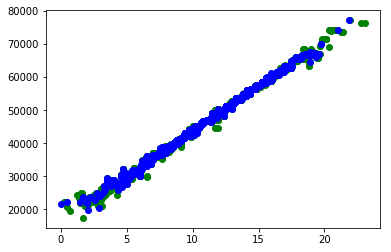

In [65]:
male=X_test.loc[X_test.gender==1]['y_hat_no_bias']
m_years=X_test.loc[X_test.gender==1]['experience']
plt.plot(m_years, male, 'go')
female=X_test.loc[X_test.gender==0]['y_hat_no_bias']
fm_years=X_test.loc[X_test.gender==0]['experience']
plt.plot(fm_years, female, 'bo')

In [66]:
##AFTER REMOVING BIAS

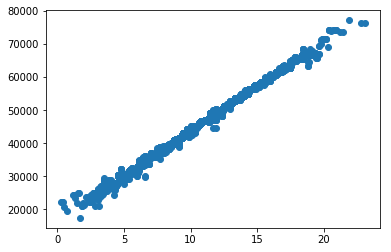

In [67]:

import matplotlib.pyplot as plt
male=X_test.loc[X_test.gender==1]
male_salary=male['y_hat_no_bias'] #male['salary']
male_experience=male['experience']
plt.scatter(male_experience,male_salary)


In [68]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(male[['experience']], male['y_hat_no_bias'], test_size=0.2, random_state=101)

In [69]:
from sklearn.linear_model import LinearRegression
lm_m = LinearRegression()
lm_m.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

([], <a list of 0 Text yticklabel objects>)

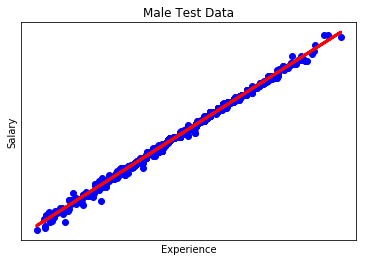

In [71]:
plt.scatter(X_test1, y_test1,  color='blue')
plt.plot(X_test1, lm_m.predict(np.asarray(X_test1).reshape(-1,1)), color='red',linewidth=3)
plt.title('Male Test Data')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.xticks(())
plt.yticks(())

In [72]:
import numpy as np
lm_m.predict(np.array([[10],[12]]))

array([43872.99060098, 49316.7008271 ])

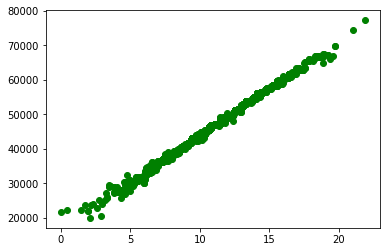

In [73]:
import matplotlib.pyplot as plt
female=X_test.loc[X_test.gender==0]
female_salary=female['y_hat_no_bias']
female_experience=female['experience']
plt.scatter(female_experience,female_salary,c='g')

In [74]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(female['experience'], female['y_hat_no_bias'], test_size=0.1, random_state=101)

In [77]:
lm = LinearRegression()
lm.fit(np.asarray(X_train2).reshape(-1,1),y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
predictions = lm.predict(np.asarray(X_test2).reshape(-1,1))

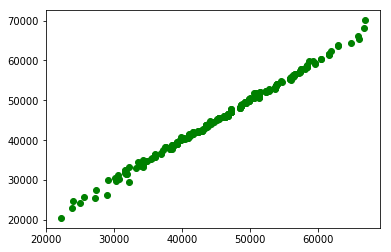

In [81]:
plt.scatter(y_test2,predictions,c='g')

In [82]:
lm.predict(np.array([[10],[12]]))

array([43862.82115117, 49318.33542269])

In [83]:
import random
Common_test=[]
for j in range(25): 
        Common_test.append(random.randint(1, 50)) 

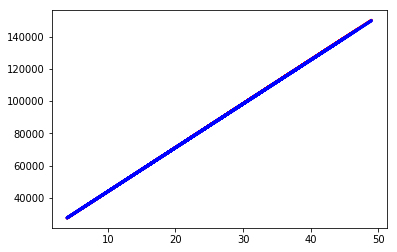

In [86]:

plt.plot(Common_test, lm.predict(np.asarray(Common_test).reshape(-1,1)), color='red',linewidth=3)
plt.plot(Common_test, lm_m.predict(np.asarray(Common_test).reshape(-1,1)), color='blue',linewidth=3)
